The data has been taken from https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
sst = pd.read_excel('C:\\Users\\Admin\\Documents\\Python\\Superstore\\Sample - Superstore.xls')

In [2]:
sst.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 21
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN


In [3]:
sst['Sales'].isnull().value_counts()

False    9994
Name: Sales, dtype: int64

There are no null values

We have daily data, we will forecast on Month

In [4]:
furniture = sst.loc[sst['Category'] == 'Furniture']

In [5]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [6]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [7]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [8]:
# Setting Date as index
furniture = furniture.set_index('Order Date')

In [9]:
#Calculating Sales over Month Start using resample method
y = pd.DataFrame(furniture['Sales'].resample('MS').sum())

In [10]:
y['2017':]

,Sales
Order Date,
2017-01-01,5964.0320
2017-02-01,6866.3374
2017-03-01,10893.4448
2017-04-01,9065.9581
2017-05-01,16957.5582
2017-06-01,19008.5867
2017-07-01,11813.0220
2017-08-01,15441.8740
2017-09-01,29028.2060


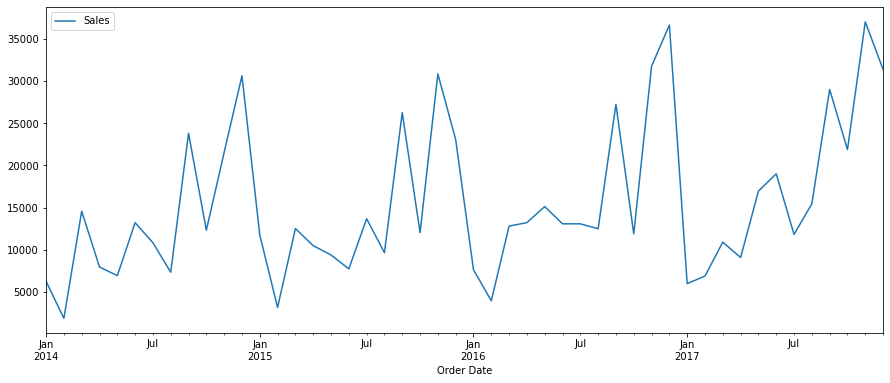

In [11]:
y.plot(figsize=(15, 6))
plt.show()

Seasonality of 12 months can be seen.

In [12]:
### Testing For Stationarity
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(y)

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [15]:
adfuller_test(y)

ADF Test Statistic : -4.699026242828902
p-value : 8.450793985809671e-05
#Lags Used : 0
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


p_value is less than 0.05, hence null hypothesis stands rejected. The series is stationary according to adfuller test but seeing it visually it is not stationary as it has seasonality and trend

In [16]:
y['Seasonal first difference']=y-y.shift(12)

In [17]:
y['Seasonal first difference']

Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01           NaN
2014-11-01           NaN
2014-12-01           NaN
2015-01-01     5497.4166
2015-02-01     1294.7160
2015-03-01    -2074.1730
2015-04-01     2530.8615
2015-05-01     2462.1635
2015-06-01    -5491.9466
2015-07-01     2853.3690
2015-08-01     2318.2457
2015-09-01     2456.5422
2015-10-01     -277.6235
2015-11-01     9315.9598
2015-12-01    -7560.1473
2016-01-01    -4117.1986
2016-02-01      791.1770
2016-03-01      301.3090
2016-04-01     2736.3915
2016-05-01     5744.8845
2016-06-01     5356.3930
2016-07-01     -605.9010
2016-08-01     2844.6401
2016-09-01      989.8579
2016-10-01     -154.0465
2016-11-01      902.7963
2016-12-01    13592.8958
2017-01-01    -1658.7110
2017-02-01     2940.7864
2017-03-01    -1907.6472
2017-04-01    

In [18]:
adfuller_test(y['Seasonal first difference'].dropna())

ADF Test Statistic : -6.373182378902408
p-value : 2.317914371466247e-08
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Order Date'>

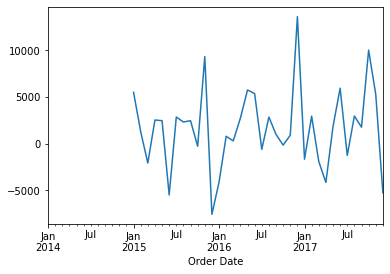

In [19]:
y['Seasonal first difference'].plot()

## Auto Regressive Model
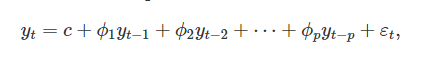

###### Identification of an AR model is often best done with the PACF.
    o	For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

###### Identification of an MA model is often best done with the ACF rather than the PACF.
    o	For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

    p,d,q p AR model lags d differencing q MA lags


In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

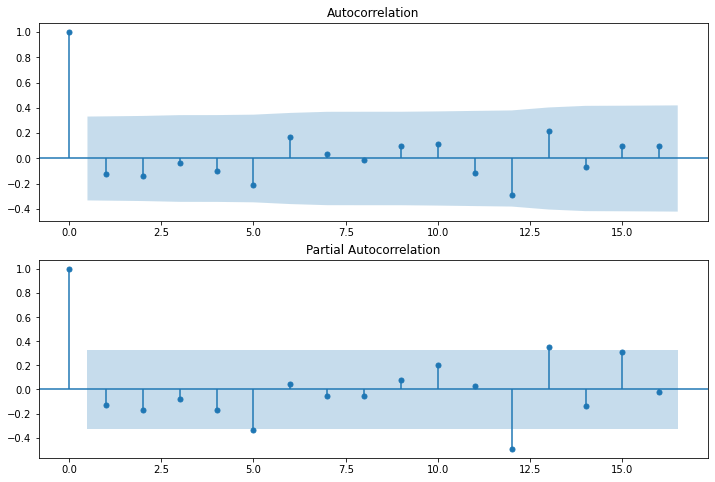

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(y['Seasonal first difference'].iloc[13:],ax=ax1)# After NaN values
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(y['Seasonal first difference'].iloc[13:],ax=ax2)


AR value seems zero as , we look at the partial autocorrelation plot and identify the lag after which most lags are not significant.
MA value also seems zero as, q which represents the biggest lag after which other lags are not significant on the autocorrelation plot

In [22]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(y['Sales'],order=(0, 1, 0),seasonal_order=(0,1,0,12))
results=model.fit()

In [23]:
y['Sales']

Order Date
2014-01-01     6242.5250
2014-02-01     1839.6580
2014-03-01    14573.9560
2014-04-01     7944.8370
2014-05-01     6912.7870
2014-06-01    13206.1256
2014-07-01    10821.0510
2014-08-01     7320.3465
2014-09-01    23816.4808
2014-10-01    12304.2470
2014-11-01    21564.8727
2014-12-01    30645.9665
2015-01-01    11739.9416
2015-02-01     3134.3740
2015-03-01    12499.7830
2015-04-01    10475.6985
2015-05-01     9374.9505
2015-06-01     7714.1790
2015-07-01    13674.4200
2015-08-01     9638.5922
2015-09-01    26273.0230
2015-10-01    12026.6235
2015-11-01    30880.8325
2015-12-01    23085.8192
2016-01-01     7622.7430
2016-02-01     3925.5510
2016-03-01    12801.0920
2016-04-01    13212.0900
2016-05-01    15119.8350
2016-06-01    13070.5720
2016-07-01    13068.5190
2016-08-01    12483.2323
2016-09-01    27262.8809
2016-10-01    11872.5770
2016-11-01    31783.6288
2016-12-01    36678.7150
2017-01-01     5964.0320
2017-02-01     6866.3374
2017-03-01    10893.4448
2017-04-01    

<AxesSubplot:xlabel='Order Date'>

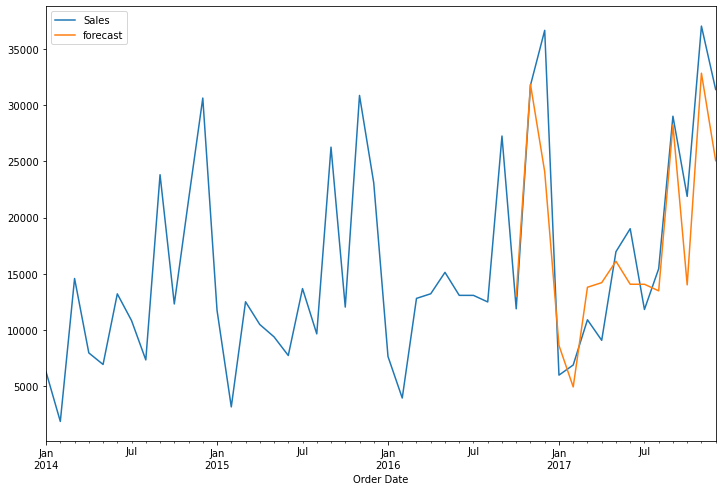

In [24]:
y['forecast']=results.predict(start=y.shape[0]-15,end=y.shape[0],dynamic=True)
y[['Sales','forecast']].plot(figsize=(12,8))

In [25]:
results.predict(start=y.shape[0]-8,end=y.shape[0],dynamic=True)

2017-05-01    10973.7031
2017-06-01     8924.4401
2017-07-01     8922.3871
2017-08-01     8337.1004
2017-09-01    23116.7490
2017-10-01     7726.4451
2017-11-01    27637.4969
2017-12-01    32532.5831
2018-01-01     1817.9001
Freq: MS, Name: predicted_mean, dtype: float64

Alkaike’s Information Criterion (AIC), which was useful in selecting predictors for regression, is also useful for determining the order of an ARIMA model. It can be written as
AIC=−2log(L)+2(p+q+k+1),

We try to see lowest value of AIC to determine the best fit of p,q, P, Q

In [26]:
from tqdm import tqdm_notebook
from itertools import product
ps = range(0, 3)
d = 1
qs = range(0, 3)
Ps = range(0, 3)
D = 1
Qs = range(0, 3)
s = 12

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(y['Sales'], order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    print(result_table)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(y['Sales'], order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())

<ipython-input-26-58f3fdf3493f>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters foun


               0           1
0   (0, 0, 0, 0)  714.997449
1   (0, 0, 0, 1)  713.820370
2   (0, 0, 0, 2)  714.901800
3   (0, 0, 1, 0)  713.494130
4   (0, 0, 1, 1)  711.502170
..           ...         ...
76  (2, 2, 1, 1)  710.517362
77  (2, 2, 1, 2)  712.262734
78  (2, 2, 2, 0)  710.821493
79  (2, 2, 2, 1)  712.281788
80  (2, 2, 2, 2)  714.241413

[81 rows x 2 columns]


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -348.952
Date:                            Sun, 02 Jan 2022   AIC                            707.904
Time:                                    20:30:18   BIC                            715.681
Sample:                                01-01-2014   HQIC                           710.589
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4363      0.172      2.529      0.011       0.098       0.774
ma.L1         -0.8722      0.143   

In [27]:
print(p,q,P,Q)

1 1 1 1


Minimizing AIC should give us a better fit

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<AxesSubplot:xlabel='Order Date'>

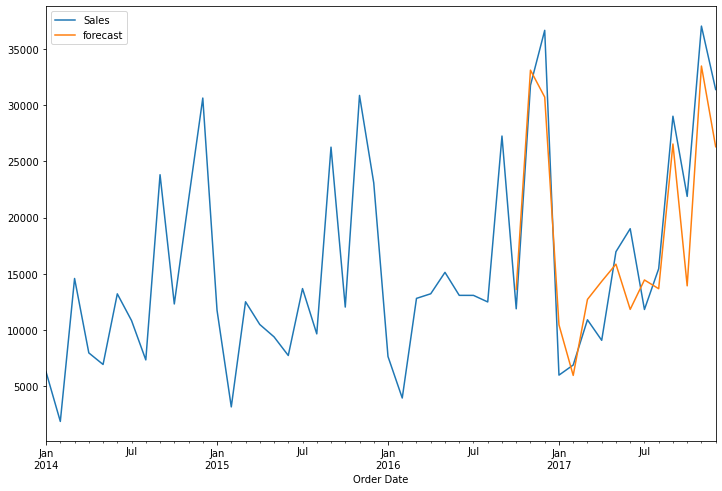

In [37]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(y['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
y['forecast']=results.predict(start=y.shape[0]-15,end=y.shape[0]+12,dynamic=True)
y[['Sales','forecast']].plot(figsize=(12,8))

In [29]:
# x =pd.DataFrame({'forecast':results.predict(start=y.shape[0]-15,end=y.shape[0]+12,dynamic=True)})
# y = pd.concat([y,x],axis=0)

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates=[y.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [39]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=y.columns)

In [40]:
future_datest_df.tail()

,Sales,Seasonal first difference,forecast
2019-07-01,NaN,NaN,NaN
2019-08-01,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN


In [41]:
future_df=pd.concat([y,future_datest_df])

In [44]:
future_df['forecast'] = pd.DataFrame({'forecast':results.predict(start=y.shape[0]-1,end=y.shape[0]+12,dynamic=True)})

<AxesSubplot:>

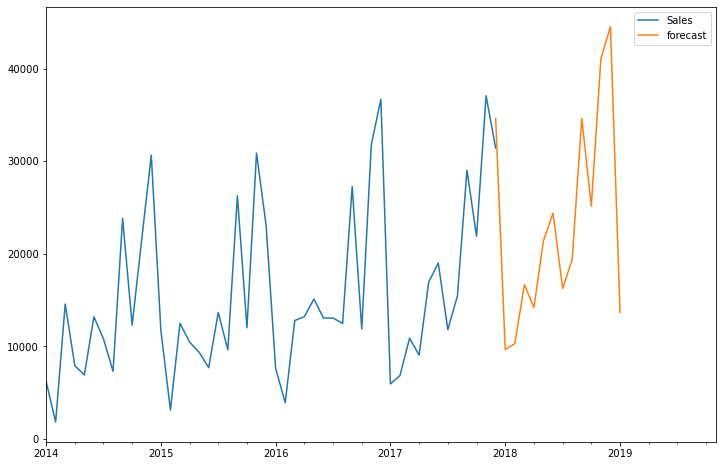

In [45]:
future_df[['Sales','forecast']].plot(figsize=(12,8))